In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
#Loading .csv file using pandas
telco= pd.read_csv('telco_1.csv')


In [3]:
#new dataframe copy with only month to month customers
telco_dfM= telco[(telco['contract_type'] == 0)]

telco_dfM

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn
1,0003-MKNFE,Male,0,No,No,2,1,0,Mailed check,59.90,542.40,No
2,0004-TLHLJ,Male,0,No,No,1,2,0,Electronic check,73.90,280.85,Yes
3,0011-IGKFF,Male,1,Yes,No,1,2,0,Electronic check,98.00,1237.85,Yes
4,0013-EXCHZ,Female,1,Yes,No,1,2,0,Mailed check,83.90,267.40,Yes
5,0013-MHZWF,Female,0,No,Yes,1,1,0,Credit card (automatic),69.40,571.45,No
...,...,...,...,...,...,...,...,...,...,...,...,...
7039,9992-RRAMN,Male,0,No,No,1,0,0,Mailed check,18.90,18.90,No
7042,9995-HOTOH,Female,0,No,No,1,2,0,Mailed check,70.15,70.15,Yes
7043,NaN,Female,0,No,No,1,0,0,Bank transfer (automatic),20.95,85.50,Yes
7045,NaN,Male,0,Yes,No,2,2,0,Electronic check,85.10,1873.70,Yes


In [4]:
#number of rows and columns
telco_dfM

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn
1,0003-MKNFE,Male,0,No,No,2,1,0,Mailed check,59.90,542.40,No
2,0004-TLHLJ,Male,0,No,No,1,2,0,Electronic check,73.90,280.85,Yes
3,0011-IGKFF,Male,1,Yes,No,1,2,0,Electronic check,98.00,1237.85,Yes
4,0013-EXCHZ,Female,1,Yes,No,1,2,0,Mailed check,83.90,267.40,Yes
5,0013-MHZWF,Female,0,No,Yes,1,1,0,Credit card (automatic),69.40,571.45,No
...,...,...,...,...,...,...,...,...,...,...,...,...
7039,9992-RRAMN,Male,0,No,No,1,0,0,Mailed check,18.90,18.90,No
7042,9995-HOTOH,Female,0,No,No,1,2,0,Mailed check,70.15,70.15,Yes
7043,NaN,Female,0,No,No,1,0,0,Bank transfer (automatic),20.95,85.50,Yes
7045,NaN,Male,0,Yes,No,2,2,0,Electronic check,85.10,1873.70,Yes


In [5]:
#Looking at what datatype telco_copy is
type(telco_dfM)

pandas.core.frame.DataFrame

# Looking at dependents as an option for driver of churn for month to month plan customers

In [6]:
#Once I filter by dependents, datatype is a series
type(telco_dfM['dependents'])

pandas.core.series.Series

In [7]:
#make a variable for dependents, didn't use went a different route
dependents= telco_dfM['dependents']

dependents

1        No
2        No
3        No
4        No
5       Yes
       ... 
7039     No
7042     No
7043     No
7045     No
7046     No
Name: dependents, Length: 3876, dtype: object

In [8]:
#count all in dependents, didn't use went a different route
dependents.count()

3876

In [9]:
#count number of customers with dependents who are on month to month plans
dependents_and_month_to_month = telco_dfM[(telco_dfM["dependents"]=="Yes")]


dependents_and_month_to_month.count()

customer_id          790
gender               790
is_senior_citizen    790
partner              790
dependents           790
phone_service        790
internet_service     790
contract_type        790
payment_type         790
monthly_charges      790
total_charges        790
churn                790
dtype: int64

In [10]:
#count number of customers without dependents who are on month to month plans
no_dependents_and_month_to_month = telco_dfM[(telco_dfM["dependents"]=="No")]

no_dependents_and_month_to_month.count()

customer_id          3083
gender               3086
is_senior_citizen    3086
partner              3086
dependents           3086
phone_service        3086
internet_service     3086
contract_type        3086
payment_type         3086
monthly_charges      3086
total_charges        3086
churn                3086
dtype: int64

In [11]:
# Total count number of customers with and wthout dependents who are on month to month plans
total_dependents_and_month_to_month = dependents_and_month_to_month.count() + no_dependents_and_month_to_month.count()

total_dependents_and_month_to_month

customer_id          3873
gender               3876
is_senior_citizen    3876
partner              3876
dependents           3876
phone_service        3876
internet_service     3876
contract_type        3876
payment_type         3876
monthly_charges      3876
total_charges        3876
churn                3876
dtype: int64

In [12]:
#count number of customers with dependents who are on month to month plans who have churned
churned_dependents_and_month_to_month = telco_dfM[(telco_dfM["dependents"]=="Yes") & (telco_dfM['churn']== "Yes")]

churned_dependents_and_month_to_month.count()

customer_id          260
gender               260
is_senior_citizen    260
partner              260
dependents           260
phone_service        260
internet_service     260
contract_type        260
payment_type         260
monthly_charges      260
total_charges        260
churn                260
dtype: int64

In [13]:
#count number of customers with dependents who are on month to month plans who have churned

churned_no_dependents_and_month_to_month = telco_dfM[(telco_dfM["dependents"]=="No") & (telco_dfM['churn']== "Yes")]

churned_no_dependents_and_month_to_month.count()

customer_id          1394
gender               1396
is_senior_citizen    1396
partner              1396
dependents           1396
phone_service        1396
internet_service     1396
contract_type        1396
payment_type         1396
monthly_charges      1396
total_charges        1396
churn                1396
dtype: int64

In [14]:
# % of people who have churned that have dependents
percent_churn_dependents= (churned_dependents_and_month_to_month.count()/total_dependents_and_month_to_month) * 100

percent_churn_dependents

customer_id          6.713142
gender               6.707946
is_senior_citizen    6.707946
partner              6.707946
dependents           6.707946
phone_service        6.707946
internet_service     6.707946
contract_type        6.707946
payment_type         6.707946
monthly_charges      6.707946
total_charges        6.707946
churn                6.707946
dtype: float64

In [15]:
# % of people who have churned that do not have dependents
percent_churn_no_dependents= (churned_no_dependents_and_month_to_month.count()/total_dependents_and_month_to_month) *100


percent_churn_no_dependents

customer_id          35.992770
gender               36.016512
is_senior_citizen    36.016512
partner              36.016512
dependents           36.016512
phone_service        36.016512
internet_service     36.016512
contract_type        36.016512
payment_type         36.016512
monthly_charges      36.016512
total_charges        36.016512
churn                36.016512
dtype: float64

# Looking at senior citizens as an option for driver of churn for month to month plan customers

In [23]:
#count number of customers who are senior_citizens who are on month to month plans
senior_and_month_to_month = telco_dfM[(telco_dfM["is_senior_citizen"]== 1)]

senior_and_month_to_month.count()

customer_id          807
gender               807
is_senior_citizen    807
partner              807
dependents           807
phone_service        807
internet_service     807
contract_type        807
payment_type         807
monthly_charges      807
total_charges        807
churn                807
dtype: int64

In [24]:
#count number of customers who are not senior_citizens who are on month to month plans
no_senior_and_month_to_month = telco_dfM[(telco_dfM["is_senior_citizen"]== 0)]

no_senior_and_month_to_month.count()

customer_id          3066
gender               3069
is_senior_citizen    3069
partner              3069
dependents           3069
phone_service        3069
internet_service     3069
contract_type        3069
payment_type         3069
monthly_charges      3069
total_charges        3069
churn                3069
dtype: int64

In [25]:
# total of all customers that are month to month
total_month_to_month= senior_and_month_to_month.count() + no_senior_and_month_to_month.count()

total_month_to_month

customer_id          3873
gender               3876
is_senior_citizen    3876
partner              3876
dependents           3876
phone_service        3876
internet_service     3876
contract_type        3876
payment_type         3876
monthly_charges      3876
total_charges        3876
churn                3876
dtype: int64

In [26]:
#Percent of seniors who churn
percent_senior_churn= (senior_and_month_to_month.count() / total_month_to_month) * 100

percent_senior_churn

customer_id          20.836561
gender               20.820433
is_senior_citizen    20.820433
partner              20.820433
dependents           20.820433
phone_service        20.820433
internet_service     20.820433
contract_type        20.820433
payment_type         20.820433
monthly_charges      20.820433
total_charges        20.820433
churn                20.820433
dtype: float64

<AxesSubplot:xlabel='churn', ylabel='Count'>

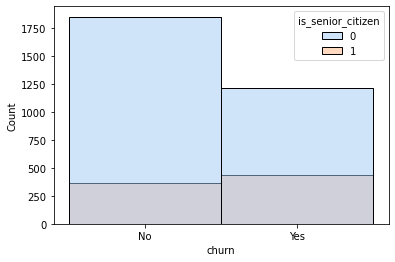

In [27]:
#chart for senior citizens who have churn 
sns.histplot(data= telco_dfM, x= 'churn', hue= 'is_senior_citizen', palette='pastel')

In [28]:
#see count is_senior_citizens
telco_dfM.is_senior_citizen.value_counts()

0    3069
1     807
Name: is_senior_citizen, dtype: int64

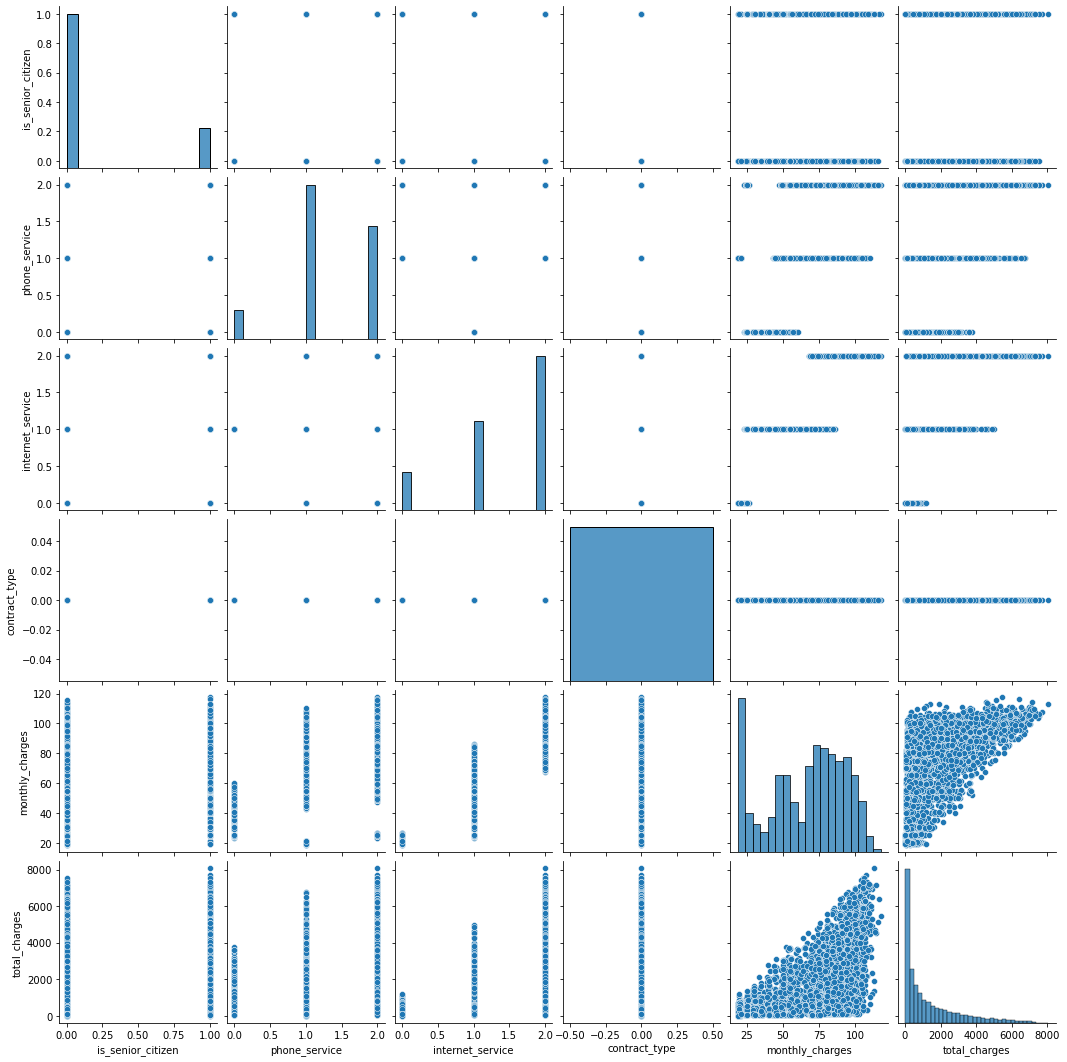

In [29]:
#To get a quick overview, does not include churn column
sns.pairplot(telco_dfM)